In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


# import the ML algorithm
from sklearn.tree import DecisionTreeClassifier

# pre-processing
# from sklearn import preprocessing
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import scale
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing.data import QuantileTransformer
# from sklearn.preprocessing import Imputer
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import RFECV

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

In [2]:
# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: 
#    - an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, 
#    - an array y of integer values, size [n_samples], holding the class labels for the 
#      training samples:

In [2]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\titanic-train.csv"

In [3]:
# load the training data 
train = pd.read_csv(location)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [9]:
# We will remove ‘Cabin’, ‘Name’ and ‘Ticket’ columns as they require some processing 
# to extract useful features

In [7]:
# drop the Cabin feature since it is missing a lot of the data
train.pop('Cabin')
train.pop('Name')
train.pop('Ticket')

train.shape

(891, 9)

In [8]:
# Filling missing Age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [9]:
# Filling missing Embarked values with most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [10]:
train['Embarked'].mode()


0    S
dtype: object

In [11]:
# ‘Pclass’ is a categorical feature so we convert its values to strings

train['Pclass'] = train['Pclass'].apply(str)

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [12]:
train.dtypes[train.dtypes == 'object'].index

Index(['Pclass', 'Sex', 'Embarked'], dtype='object')

In [13]:
# # Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [17]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [14]:
# Prepare data for training models
labels = train.pop('Survived')

In [15]:
# For testing, we choose to split our data to 75% train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [16]:
# Instantiate dec tree
dt = DecisionTreeClassifier()

In [17]:
# train the classifier 
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### view the tree

In [22]:
# Install windows package from: 
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# Install python graphviz package (pip install graphviz)
# Add ...\Graphviz2.38\bin to User path
# Add ...\Graphviz2.38\bin\dot.exe to System Path

In [18]:
import graphviz 
from sklearn.tree import export_graphviz

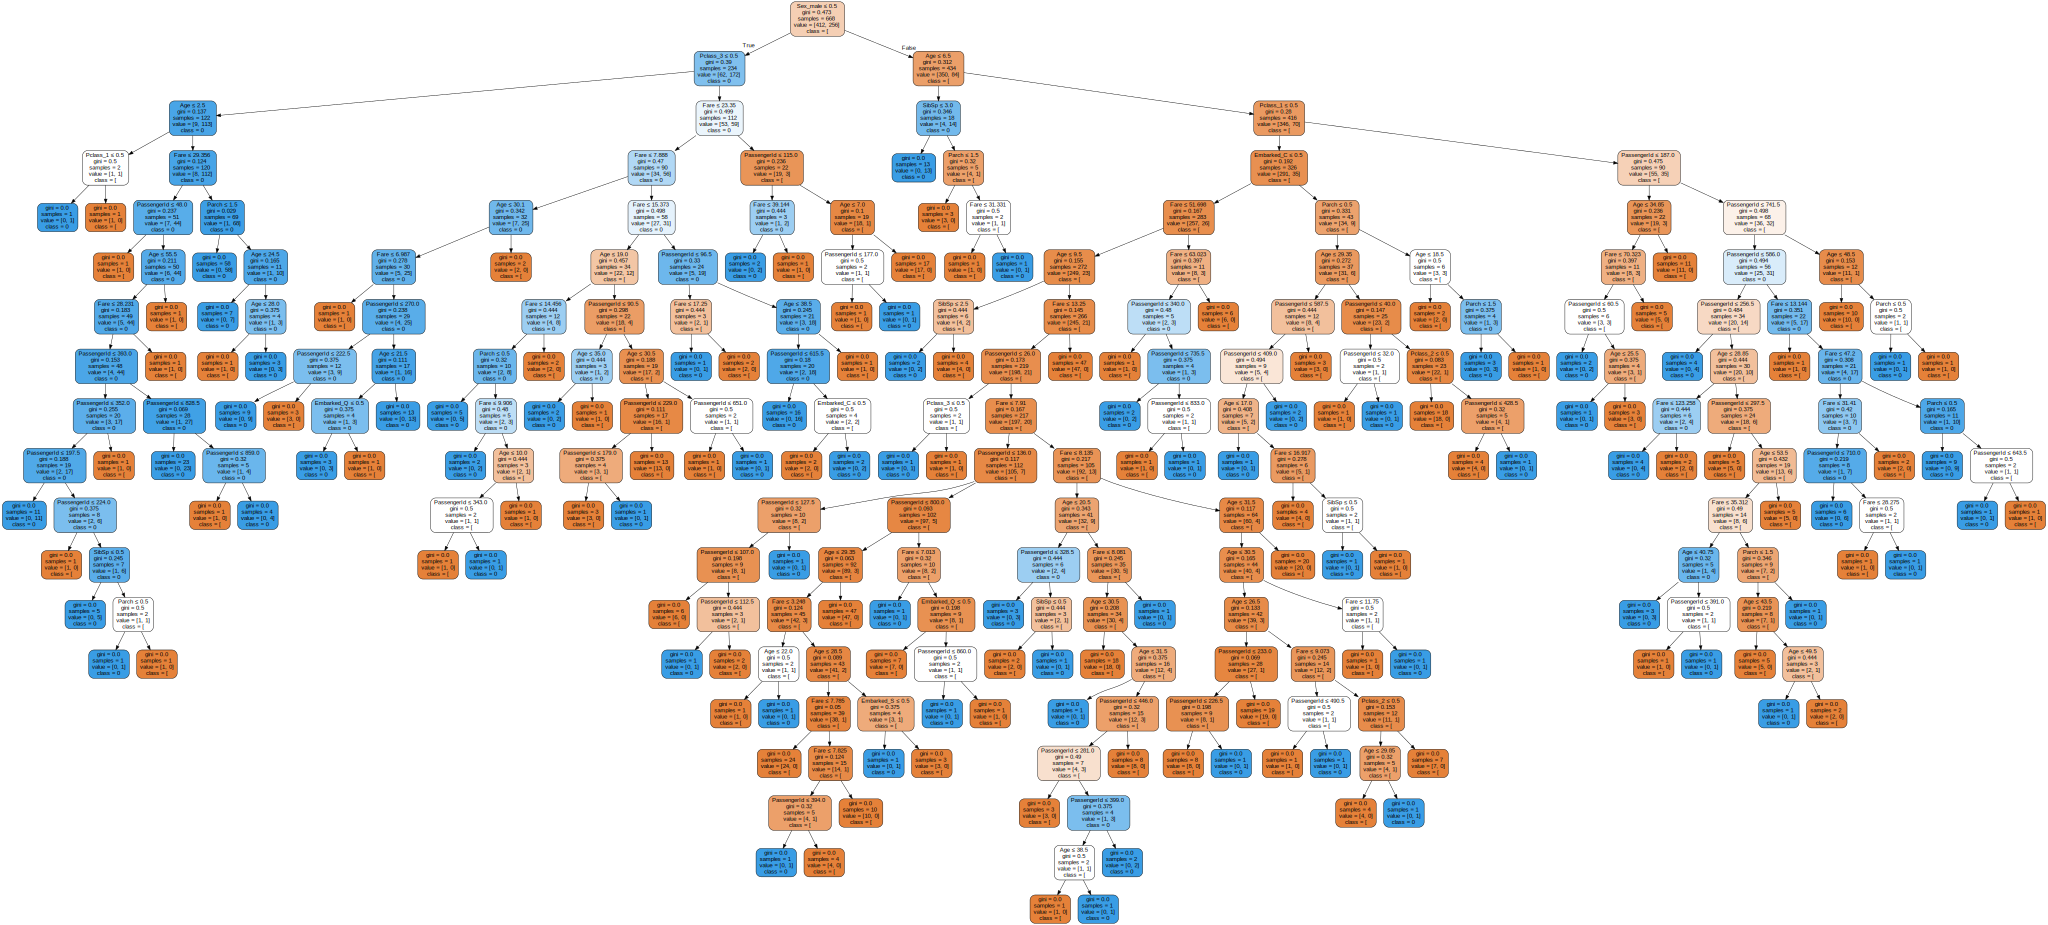

In [19]:
dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=train.columns,  
                           class_names=str(labels.unique()),  
                           filled=True, 
                           rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  

graph.render("C:\\Users\\Admin\\Desktop\\titanic") 
graph 

In [20]:
# feature selection
dt.feature_importances_

array([0.2124483 , 0.16400066, 0.0327328 , 0.02663409, 0.15782259,
       0.0385702 , 0.00173022, 0.06217495, 0.        , 0.2823295 ,
       0.00959354, 0.00721308, 0.00475008])

In [21]:
train.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [22]:
for i in zip(train.columns, dt.feature_importances_):
    print(i)

('PassengerId', 0.21244829904687665)
('Age', 0.16400066220910134)
('SibSp', 0.032732797811681306)
('Parch', 0.026634085977713693)
('Fare', 0.15782259251405317)
('Pclass_1', 0.038570195794518966)
('Pclass_2', 0.0017302208649922653)
('Pclass_3', 0.06217495337795622)
('Sex_female', 0.0)
('Sex_male', 0.282329501500344)
('Embarked_C', 0.009593536911392364)
('Embarked_Q', 0.007213078141855447)
('Embarked_S', 0.004750075849514562)


In [23]:
# predict
y_pred = dt.predict(x_test)

In [24]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.7488789237668162

In [24]:
dt.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [28]:
# We will use AUC (Area Under Curve) as the evaluation metric. 
# Our target value is binary so it’s a binary classification problem. 
# AUC is a good way for evaluation for this type of problems.

In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [26]:
thresholds

array([2, 1, 0], dtype=int64)

In [27]:
type(true_positive_rate)

numpy.ndarray

In [28]:
false_positive_rate

array([0.        , 0.26811594, 1.        ])

In [29]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7424126172208013

# Pruning of trees
### max_depth

In [27]:
# This indicates how deep the tree can be. The deeper the tree, the more splits it has and 
# it captures more information about the data. We fit a decision tree with depths ranging from 
# 1 to 32 

In [30]:
np.linspace(1, 32, 32)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [31]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
max_depths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [33]:
train_results = []
test_results  = []

In [34]:
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_pred = dt.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_results.append(roc_auc)

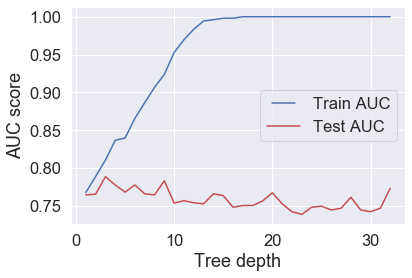

In [35]:
#  model overfits for large depth values. The tree perfectly predicts all of the train data, 
# however, it fails to generalize the findings for new data

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(max_depths, test_results,  'r', label= 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')

plt.show()

In [43]:
# min_samples_split

In [44]:
# min_samples_split represents the minimum number of samples required to split an internal node. 

# This can vary between considering at least one sample at each node to considering all of the 
# samples at each node. When we increase this parameter, the tree becomes more constrained as it 
# has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of 
# the samples

In [36]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

In [37]:
min_samples_splits

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [38]:
train_results = []
test_results = []

In [39]:
for min_samples_split in min_samples_splits:
    
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    
    y_pred = dt.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    test_results.append(roc_auc)

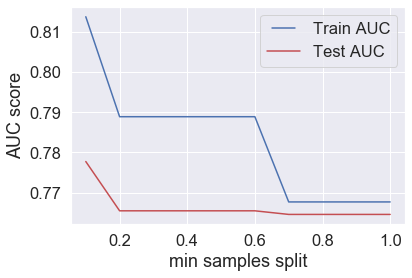

In [40]:
# when we consider 100% of the samples at each node, the model cannot learn enough about 
# the data. This is an underfitting case.

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label=  'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

#### max_features represents the number of features to consider when looking for the best split.

    max_features : int, float, string or None, optional (default=None)
    The number of features to consider when looking for the best split:

    If int, then consider max_features features at each split.
    If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
    If “auto”, then max_features=sqrt(n_features).
    If “sqrt”, then max_features=sqrt(n_features).
    If “log2”, then max_features=log2(n_features).
    If None, then max_features=n_features.

In [41]:
max_features = list(range(1, train.shape[1]))
max_features

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
# max_features = ['None', 'sqrt', 'log2']

In [42]:
train_results = []
test_results = []

In [43]:
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    
    y_pred = dt.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    test_results.append(roc_auc)

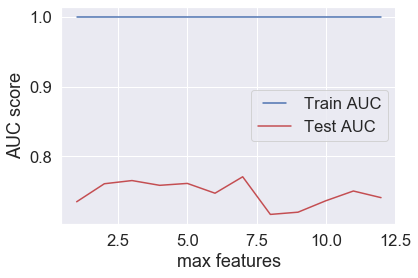

In [44]:
# This is also an overfitting case.
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results,  'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [55]:
dt.feature_importances_

array([0.18095083, 0.15603835, 0.02608505, 0.00772448, 0.18375996,
       0.02654599, 0.00954331, 0.08649032, 0.30229115, 0.        ,
       0.00429981, 0.00424147, 0.01202929])

In [56]:
x_train.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [41]:
dt.feature_importances_

array([0.20215744, 0.15485291, 0.05303517, 0.00518904, 0.1383224 ,
       0.0245611 , 0.00421609, 0.0633356 , 0.33510469, 0.        ,
       0.00248641, 0.01559832, 0.00114083])